In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 24s 1us/step


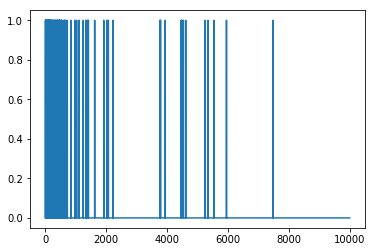

In [3]:
plt.plot(train_data[0])

In [4]:
# Demonstrate overfitting

In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 12s - loss: 0.4874 - acc: 0.8071 - binary_crossentropy: 0.4874 - val_loss: 0.3387 - val_acc: 0.8781 - val_binary_crossentropy: 0.3387
Epoch 2/20
 - 5s - loss: 0.2492 - acc: 0.9122 - binary_crossentropy: 0.2492 - val_loss: 0.2852 - val_acc: 0.8876 - val_binary_crossentropy: 0.2852
Epoch 3/20
 - 5s - loss: 0.1811 - acc: 0.9376 - binary_crossentropy: 0.1811 - val_loss: 0.2899 - val_acc: 0.8852 - val_binary_crossentropy: 0.2899
Epoch 4/20
 - 5s - loss: 0.1432 - acc: 0.9515 - binary_crossentropy: 0.1432 - val_loss: 0.3168 - val_acc: 0.8790 - val_binary_crossentropy: 0.3168
Epoch 5/20
 - 5s - loss: 0.1158 - acc: 0.9624 - binary_crossentropy: 0.1158 - val_loss: 0.3431 - val_acc: 0.8758 - val_binary_crossentropy: 0.3431
Epoch 6/20
 - 4s - loss: 0.0917 - acc: 0.9730 - binary_crossentropy: 0.0917 - val_loss: 0.3749 - val_acc: 0.8705 - val_binary_crossentropy: 0.3749
Epoch 7/20
 - 4s - loss: 0.0720 - acc: 0.9810 - binary_crossentropy

In [7]:
## Create a smaller model

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6438 - acc: 0.7404 - binary_crossentropy: 0.6438 - val_loss: 0.5803 - val_acc: 0.8357 - val_binary_crossentropy: 0.5803
Epoch 2/20
 - 5s - loss: 0.4952 - acc: 0.8638 - binary_crossentropy: 0.4952 - val_loss: 0.4438 - val_acc: 0.8591 - val_binary_crossentropy: 0.4438
Epoch 3/20
 - 5s - loss: 0.3656 - acc: 0.8881 - binary_crossentropy: 0.3656 - val_loss: 0.3567 - val_acc: 0.8762 - val_binary_crossentropy: 0.3567
Epoch 4/20
 - 5s - loss: 0.2857 - acc: 0.9078 - binary_crossentropy: 0.2857 - val_loss: 0.3130 - val_acc: 0.8838 - val_binary_crossentropy: 0.3130
Epoch 5/20
 - 5s - loss: 0.2382 - acc: 0.9213 - binary_crossentropy: 0.2382 - val_loss: 0.2931 - val_acc: 0.8866 - val_binary_crossentropy: 0.2931
Epoch 6/20
 - 5s - loss: 0.2065 - acc: 0.9308 - binary_crossentropy: 0.2065 - val_loss: 0.2837 - val_acc: 0.8892 - val_binary_crossentropy: 0.2837
Epoch 7/20
 - 5s - loss: 0.1833 - acc: 0.9400 - binary_crossentropy:

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 19s - loss: 0.3450 - acc: 0.8546 - binary_crossentropy: 0.3450 - val_loss: 0.2996 - val_acc: 0.8789 - val_binary_crossentropy: 0.2996
Epoch 2/20
 - 19s - loss: 0.1360 - acc: 0.9507 - binary_crossentropy: 0.1360 - val_loss: 0.3579 - val_acc: 0.8632 - val_binary_crossentropy: 0.3579
Epoch 3/20
 - 19s - loss: 0.0423 - acc: 0.9880 - binary_crossentropy: 0.0423 - val_loss: 0.4398 - val_acc: 0.8686 - val_binary_crossentropy: 0.4398
Epoch 4/20
 - 20s - loss: 0.0063 - acc: 0.9993 - binary_crossentropy: 0.0063 - val_loss: 0.6052 - val_acc: 0.8713 - val_binary_crossentropy: 0.6052
Epoch 5/20
 - 18s - loss: 6.2813e-04 - acc: 1.0000 - binary_crossentropy: 6.2813e-04 - val_loss: 0.6764 - val_acc: 0.8717 - val_binary_crossentropy: 0.6764
Epoch 6/20
 - 19s - loss: 2.0351e-04 - acc: 1.0000 - binary_crossentropy: 2.0351e-04 - val_loss: 0.7161 - val_acc: 0.8714 - val_binary_crossentropy: 0.7161
Epoch 7/20
 - 20s - loss: 1.2571e-04 - acc: 1.

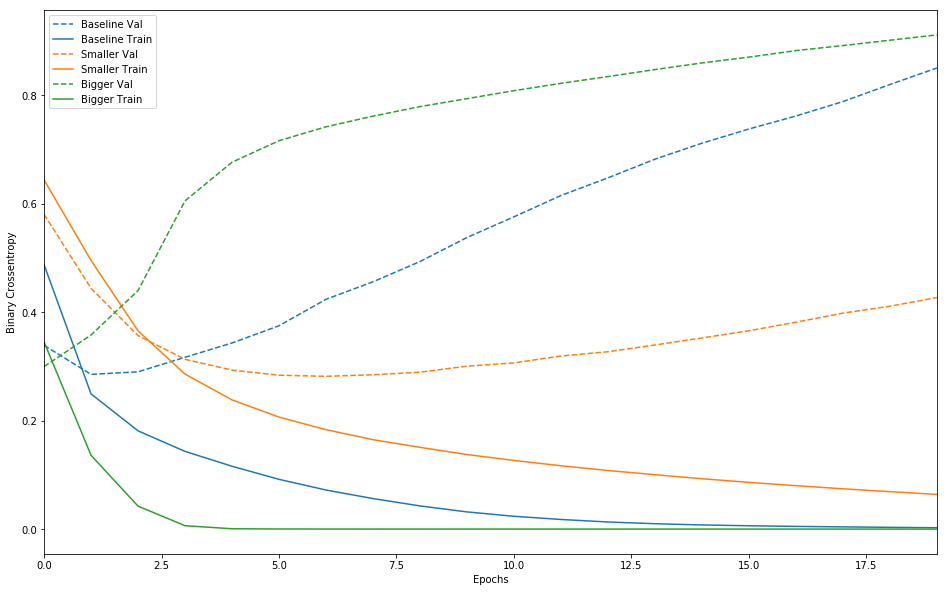

In [12]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5625 - acc: 0.7988 - binary_crossentropy: 0.5245 - val_loss: 0.4098 - val_acc: 0.8724 - val_binary_crossentropy: 0.3695
Epoch 2/20
 - 5s - loss: 0.3282 - acc: 0.9031 - binary_crossentropy: 0.2817 - val_loss: 0.3412 - val_acc: 0.8871 - val_binary_crossentropy: 0.2904
Epoch 3/20
 - 5s - loss: 0.2709 - acc: 0.9234 - binary_crossentropy: 0.2174 - val_loss: 0.3377 - val_acc: 0.8862 - val_binary_crossentropy: 0.2822
Epoch 4/20
 - 5s - loss: 0.2448 - acc: 0.9356 - binary_crossentropy: 0.1877 - val_loss: 0.3442 - val_acc: 0.8845 - val_binary_crossentropy: 0.2862
Epoch 5/20
 - 5s - loss: 0.2305 - acc: 0.9407 - binary_crossentropy: 0.1710 - val_loss: 0.3560 - val_acc: 0.8806 - val_binary_crossentropy: 0.2958
Epoch 6/20
 - 5s - loss: 0.2178 - acc: 0.9472 - binary_crossentropy: 0.1569 - val_loss: 0.3658 - val_acc: 0.8792 - val_binary_crossentropy: 0.3046
Epoch 7/20
 - 5s - loss: 0.2107 - acc: 0.9500 - binary_crossentropy:

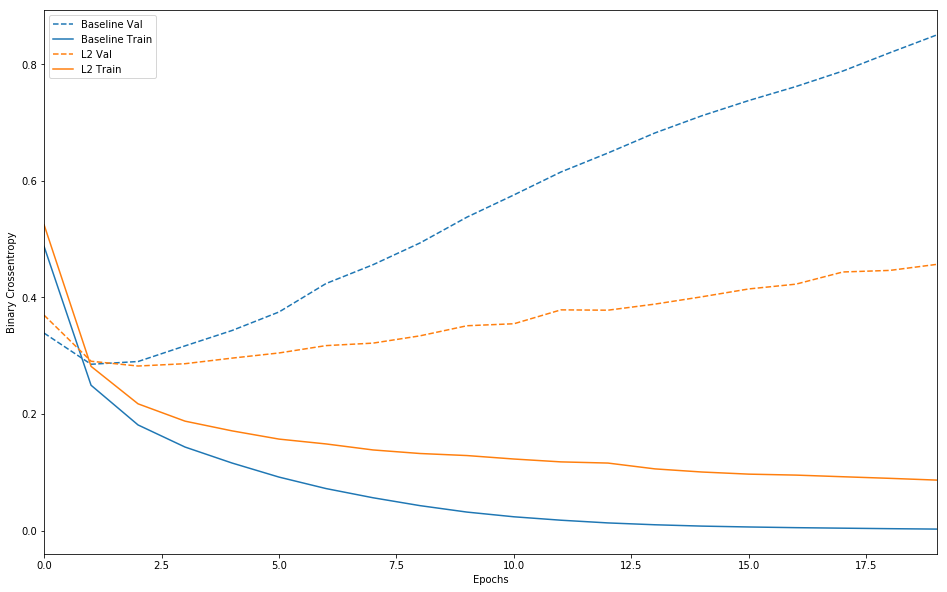

In [14]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6410 - acc: 0.6520 - binary_crossentropy: 0.6410 - val_loss: 0.5557 - val_acc: 0.7661 - val_binary_crossentropy: 0.5557
Epoch 2/20
 - 5s - loss: 0.5103 - acc: 0.8103 - binary_crossentropy: 0.5103 - val_loss: 0.4208 - val_acc: 0.8767 - val_binary_crossentropy: 0.4208
Epoch 3/20
 - 5s - loss: 0.4083 - acc: 0.8635 - binary_crossentropy: 0.4083 - val_loss: 0.3488 - val_acc: 0.8833 - val_binary_crossentropy: 0.3488
Epoch 4/20
 - 5s - loss: 0.3419 - acc: 0.8956 - binary_crossentropy: 0.3419 - val_loss: 0.3135 - val_acc: 0.8851 - val_binary_crossentropy: 0.3135
Epoch 5/20
 - 5s - loss: 0.2948 - acc: 0.9139 - binary_crossentropy: 0.2948 - val_loss: 0.3045 - val_acc: 0.8854 - val_binary_crossentropy: 0.3045
Epoch 6/20
 - 5s - loss: 0.2608 - acc: 0.9260 - binary_crossentropy: 0.2608 - val_loss: 0.3042 - val_acc: 0.8846 - val_binary_crossentropy: 0.3042
Epoch 7/20
 - 5s - loss: 0.2343 - acc: 0.9342 - binary_crossentropy:

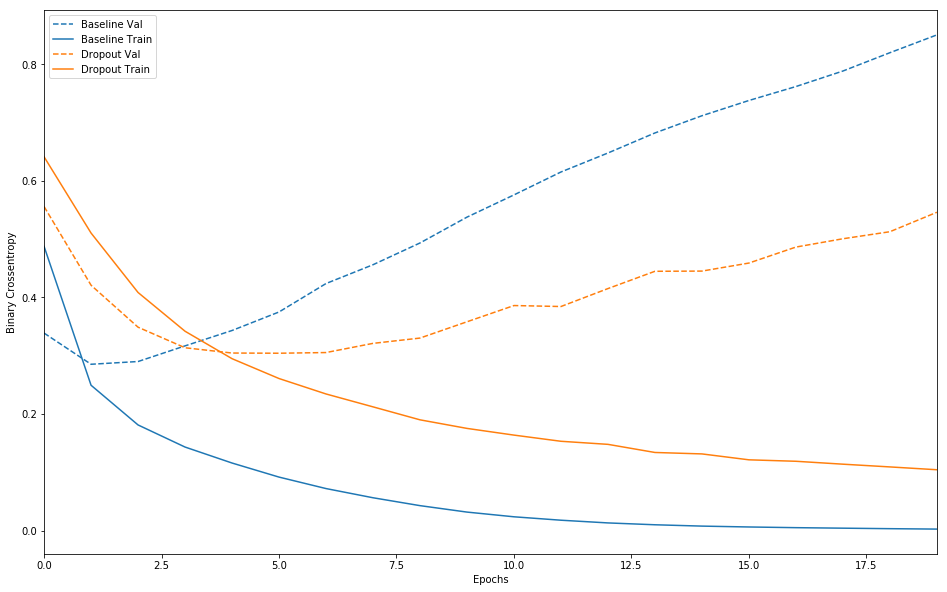

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])